In [4]:
# import library
import pandas as pd
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as met

import numpy as np
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df = df.copy()
# tampilkan 5 data teratas
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [6]:
# cek tipe data
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [7]:
# lihat jumlah baris dan kolom
df.shape

(244, 14)

In [8]:
# melihat statistik data
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,NaN


In [9]:
# ubah nilai Classes ke dalam 0 dan 1 agar dapat dibaca oleh Scikit-Learn
classes = {"Classes": {"not fire": 0, "fire": 1}}
df.replace(classes, inplace=True)

In [10]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
dtype: object

<AxesSubplot:>

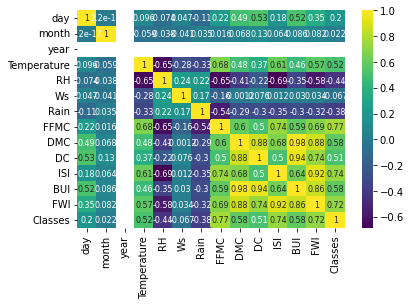

In [11]:
# melihat korelasi antar variabel
sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={'size': 8})

In [12]:
# drop atribut year karena semua kejadian pada tahun yang sama
# day dan month kita asumsikan keduanya tidak akan menjadi feature yang berguna
df = df.drop(['day', 'month', 'year'], axis=1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [13]:
df['Rain'] = df['Rain'].astype(int)
df['FFMC'] = df['FFMC'].astype(int)
df['DMC'] = df['DMC'].astype(int)
df['DC'] = df['DC'].astype(int)
df['ISI'] = df['ISI'].astype(int)
df['BUI'] = df['BUI'].astype(int)
df['FWI'] = df['FWI'].astype(int)

<AxesSubplot:>

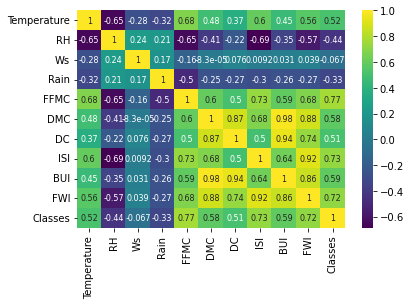

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={'size': 8})

In [16]:
# pecah data menjadi training dan testing
features = df.drop('Classes', axis=1, inplace=False)
label = df['Classes']
X_train, X_test, y_train, y_test = ms.train_test_split(features, label, test_size=0.2, random_state=0)

In [18]:
# linear regression model
linear_reg = LinearRegression()
# fit data
linear_reg.fit(X_train, y_train)
# predik data
y_pred = linear_reg.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [20]:
df_predict

,Actual,Predicted
64,1,0.702274
63,0,0.306951
55,1,0.997614
111,1,0.860292
225,1,0.708770
92,0,-0.099803
76,1,0.371829
181,1,0.846399
188,0,0.147899
180,1,0.807379


In [22]:
df_predict['Error'] = df_predict['Actual'] - df_predict['Predicted']

In [24]:
df_predict

,Actual,Predicted,Error
64,1,0.702274,0.297726
63,0,0.306951,-0.306951
55,1,0.997614,0.002386
111,1,0.860292,0.139708
225,1,0.708770,0.291230
92,0,-0.099803,0.099803
76,1,0.371829,0.628171
181,1,0.846399,0.153601
188,0,0.147899,-0.147899
180,1,0.807379,0.192621


In [26]:
np.dot(df_predict['Error'], df_predict['Error']) * (1/len(df_predict))

0.08131250204839027

In [27]:
mean_squared_error(df_predict['Actual'], df_predict['Predicted'])

0.08131250204839029

In [35]:
# learning rate 0.5
# menggunakan mlp
clf = MLPClassifier(learning_rate_init=0.05, max_iter=300, batch_size=10)
clf.fit(X_train, y_train)

MLPClassifier(batch_size=10, learning_rate_init=0.05, max_iter=300)

In [34]:
y_prediksi = clf.predict(X_test)
accuracy = met.accuracy_score(y_test, y_prediksi)
precision = met.precision_score(y_test, y_prediksi)

print("Visualisasi training error curve dengan training test = 80% dan testing test = 20%")
print("Accuracy:", accuracy,"%,", "Precision:", precision)

Visualisasi training error curve dengan training test = 80% dan testing test = 20%
Accuracy: 0.9795918367346939 %, Precision: 0.9666666666666667


Text(0.5, 1.0, 'Performace Under Varying K Values')

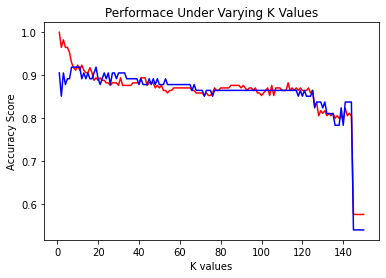

In [140]:
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

k_values=[]
for i in range(150):
    k_values.append(i+1)
train_scores=[]
test_scores=[]

k_nn=KNeighborsClassifier()

for k in k_values: 
  k_nn.n_neighbors=k 
  k_nn.fit(X_train,y_train)
  train_score=k_nn.score(X_train,y_train)
  test_score=k_nn.score(X_test,y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(k_values,train_scores, color='red',label='Training Accuracy')
plt.plot(k_values,test_scores, color='blue',label='Testing Accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying K Values')

In [144]:
param_grid = {'learning_rate_init': [0.1, 0.01, 0.5, 0.2, 0.05]}

mlp_clf = ms.GridSearchCV(MLPClassifier(), param_grid, cv=5)
mlp_clf.fit(X_train, y_train)
mlp_clf.best_params_

C:\Users\farhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farhan\App

{'learning_rate_init': 0.05}